In [1]:
%load_ext autoreload
%autoreload 2

# Object-Oriented Programming (OOP) in Python

## Lecture borrowed from Moses Marsh, Master of Mathe-magics and Actually Funny Puns

The Python Tutorial: [Classes](https://docs.python.org/3/tutorial/classes.html)

Today's Objectives:
- understand what an object & class are in Python
- write some simple classes
- write classes with "magic methods"
- write a class that inherits from another class

## [Everything in Python is an object](https://linux.die.net/diveintopython/html/getting_to_know_python/everything_is_an_object.html)

What does that mean? Today we'll think of an ***object*** as a collection of functions and variables (which in this context we'll call ***methods*** and ***attributes*** of that object).

We'll also call the ***type*** of an object its ***class***, and a ***class definition*** is the code that acts as a blueprint for building objects of that type.

#### examples: lists & strings

In [2]:
lst = [5, 2, 3, 9]

In [3]:
lst.sort()

In [4]:
lst

[2, 3, 5, 9]

In [5]:
type(lst.sort())

NoneType

**Popcorn Q for all: Oh huh... Why did it return that? Hmm... what was the *output* from lst.sort()?**

In [6]:
def dummy():
    return None

In [7]:
type(dummy())

NoneType

In [8]:
word = 'haberdashery'

In [9]:
word.capitalize()

'Haberdashery'

In [10]:
word

'haberdashery'

In [11]:
word.capitalize().split('a')

['H', 'berd', 'shery']

## Class definitions

In [1]:
class Dog:
    
    def __init__(self, name, mass, height, happy=True):
        """
        Args:
            name (str): dog's name
            mass (float): dog's mass in kg
            height (float): dog's height in m
        """
        self.name = name
        self.mass = mass
        self.height = height
        self.happy = happy
        
    def speak(self):
        return "bark bark my name is {}".format(self.name)
        
    def misbehave(self):
        self.happy = False
        return "i am being yelled at and i don't know why"

        
    def receive_treat(self, treat_mass):
        self.mass += treat_mass
        self.happy = True
        return "i am being rewarded and i don't know why"

In [2]:
dog1 = Dog('cheddar', 4, .2)

In [4]:
dog1.speak()

'bark bark my name is cheddar'

In [6]:
dog1.mass

4

In [7]:
dog1.receive_treat(6)

"i am being rewarded and i don't know why"

In [8]:
dog1.mass

10

In [9]:
dog2 = Dog('bongo', 1, 1)

In [11]:
dog2.speak()

'bark bark my name is bongo'

In [12]:
dog2.speak()

'bark bark my name is bongo'

In [21]:
Dog.speak(dog2)

'bark bark my name is bongo'

In [15]:
dog1.receive_treat(6)

"i am being rewarded and i don't know why"

In [19]:
class DogPark:

    def __init__(self, dogs):
        """ 
        Args:
            dogs (list): list of Dog objects
        """
        self.dogs = dogs
    
    def add_dog(self, dog):
        self.dogs.append(dog)
    
    def treat_all_dogs(self, treat_mass):
        for dog in self.dogs:
            dog.receive_treat(treat_mass)

**Advanced Q for above: what does the double underscore (sometimes called "dunder") around the "init" mean? It doesn't show up anywhere else in *this* class definition.**

In [20]:
clayton_dog_park = DogPark([dog1, dog2])

In [21]:
clayton_dog_park.treat_all_dogs(200)

In [22]:
dog1

In [23]:
clayton_dog_park

In [27]:
dir(clayton_dog_park)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_dog',
 'dogs',
 'treat_all_dogs']

[Guide to Python Magic Methods](https://rszalski.github.io/magicmethods/)

In [26]:
type(clayton_dog_park.treat_all_dogs)

method

In [33]:
clayton_dog_park.dogs[0]

In [29]:
dog1

In [30]:
dir(clayton_dog_park.dogs[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'happy',
 'height',
 'mass',
 'misbehave',
 'name',
 'receive_treat',
 'speak']

In [31]:
clayton_dog_park.dogs[0].name

'cheddar'

In [32]:
a_dog = clayton_dog_park.dogs[0]

In [33]:
a_dog

In [34]:
dog1

In [38]:
clayton_dog_park.dogs.index(dog2)

1

In [39]:
list.index?

In [40]:
set.discard?

In [38]:
class DogParkSet:

    def __init__(self, dogs):
        """ 
        Args:
            dogs (set): set of Dog objects
        """
        self.dogs = dogs
    
    def add_dog(self, dog):
        self.dogs.add(dog)
        
    def remove_dog(self, dog_name):
        for dog in self.dogs:
            if dog.name == dog_name:
                self.dogs.discard(dog)
                return "{} has been returned".format(dog_name)
        return "{}'s not here, man".format(dog_name)
    
    def treat_all_dogs(self, treat_mass):
        for dog in self.dogs:
            dog.fetch(treat_mass)

In [39]:
dog1.name

'cheddar'

In [40]:
dog2.name

'bongo'

In [41]:
dog_park_set = DogParkSet(set([dog1,dog2]))

In [42]:
dog_park_set.remove_dog('bess')

"bess's not here, man"

In [43]:
dog_park_set.dogs

{<__main__.Dog at 0x108024950>, <__main__.Dog at 0x10806b910>}

## Inheritance

Say you really like a certain class (like, oh, Dog), but you want to make a class for a specific type of dog. Something that has all the usual dog attributes, but maybe is constrained / expanded in one particular way.

Do you have to write your own class from scratch? Nay! You can write a new class that **inherits** all the methods and attributes of another class, and you can choose which methods to override with your own.

In [42]:
class BarklessBasenji(Dog):
    
    def speak(self):
        return '...'

In [43]:
quiet_dog = BarklessBasenji('lando', 6,2)

In [44]:
quiet_dog.height

2

In [45]:
quiet_dog.speak()

'...'

In [46]:
dog1.speak()

'bark bark my name is cheddar'

In [47]:
dog2.speak()

'bark bark my name is bongo'

In [48]:
quiet_dog

In [49]:
clayton_dog_park.add_dog(quiet_dog)

In [50]:
clayton_dog_park.dogs

In [51]:
clayton_dog_park.treat_all_dogs(5)

Or maybe you like dictionaries, but you're sick of seeing "KeyError" when a key isn't in the dictionary, and you wish it instead returned some default value. First let's start with a generic dictionary.

In [52]:
drink_dictionary = {'mark': 'milkshake',
 'michael': 'apple cider',
 'skylar': 'hot ginger lemon coke',
 'flora': 'orange juice',
 'land': 'warm milk'}
drink_dictionary

{'mark': 'milkshake',
 'michael': 'apple cider',
 'skylar': 'hot ginger lemon coke',
 'flora': 'orange juice',
 'land': 'warm milk'}

In [53]:
dict(michael='apple cider', mark='milkshake')

{'michael': 'apple cider', 'mark': 'milkshake'}

In [54]:
dict(drink_dictionary, yulin ='green tea')

{'mark': 'milkshake',
 'michael': 'apple cider',
 'skylar': 'hot ginger lemon coke',
 'flora': 'orange juice',
 'land': 'warm milk',
 'yulin': 'green tea'}

In [56]:
drink_dictionary['jack']

KeyError: 'jack'

In [57]:
class MyCoolDictionary(dict):
    
    def __init__(self, dictionary, defaultvalue=None):
        super().__init__(dictionary)
        self.default = defaultvalue
        
    def __getitem__(self, key):
        if key in self:
            return super().__getitem__(key)
        return self.default

In [58]:
dd = MyCoolDictionary(drink_dictionary, defaultvalue='yogurt')

In [62]:
dd['clayton']

'Apple Cider Vinegar'

In [60]:
dd['michael']

'apple cider'

In [65]:
'clayton' in dd

True

In [66]:
'michael' in dd

True

More about super: https://rhettinger.wordpress.com/2011/05/26/super-considered-super/

In [60]:
drink_dictionary.get?

In [61]:
drink_dictionary.get('clayton', 'gogurt')

'gogurt'

In [62]:
drink_dictionary.get('michael', 'yogurt')

'apple cider'

# Afternoon: OOP for Modeling and Data Manipulation

_Lecture based on work from Matt Drury, a true mensch_

In [108]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#from stringstamper import StringStamper
# ^^^ from local py scripy in this folder

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest, chi2

In this lesson we will be using the `sklearn` library to give examples of how object oriented programming is used in practice.  Our objective is not so much to learn about `sklearn`, but to explore how a professionally developed, widely used library uses the organizational principles of object oriented programming to provide a good user experience.

The main theme of our explorations will be the power of **Providing a Consistent Interface**.

One of the fundamental commandments of OOP is:

> Program to an interface instead of an implementation.

Sklearn is a stellar example of this important programming philosophy.

Generally, as data scientists, we will be **consumers** of code written in an object oriented style.  So let's spend the rest of the lesson studying an important example of this style from the `sklearn` library.

## Sklearn and the Transformer Interface

[Sklearn](https://scikit-learn.org/stable/) or or scikit-learn is the standard library for machine learning in python.  It contains many, many tools that will take a very long time for us to explore.  Our goal for today will be to **preview** predictive modeling using sklearn and explore only another small corner of it, the [transformers](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing).

**Transformers** are tools that transform data sets.  This is a very common operation, we have some set of data, and we want to modify it in some consistent way for use in some task.  Sklearn has a very consistent way that it expresses these types of operations, and it leverages the concepts of OOP very heavily in creating a consistent user experience.

Let's start with a couple of examples.

## Regressors and Classifiers

The first interface we will explore is the **Regression/Classification Interface**.

**Regression** and **Classification** are two sides of the same coin.  The goal of both is **Predictive Modeling** (also called Supervised Learning, a less self explanatory term).

In a predictive modeling problem we have some data $X$ (often called the **predictors**) which we want to use to make a prediction of another measurement $y$ (often called the **response**).  For example:

  - Use the history of all board game ratings on [Board Game Geek]() ($X$) to predict the rating a user will give a new game ($y$).
  - Use the history of all customers of a car insurance company ($X$) to predict the likelihood of a new customer being involved in a car accident ($y$).
  - Predict which type of animal ($y$) appears in a black and white photo taken by a wildlife camera ($X$).
  - Predict whether a flight will be delayed and, if so, how delayed it will be.
  
The general theme is that:

> We **fit** a model to some data ($X, y$), and then use the model to **predict** given some new data.

Let's look at two examples.

### Regression: Linear Regression

Our first example is **linear regression**.  In linear regression we have data $X$, and our response is a **continuous** measurement.

The data set we will use to demonstrate linear regression contains measurements on a single species of insect captured on two continents.

In [109]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


Suppose we want to predict an insects wing size given the other measurements we have.  Since wing size is a continuous measurement, linear regression is an appropriate way to approach this problem.

All **regression objects** are used in the same way in sklearn.

1\. Create a regression object of the appropriate type.

In [110]:
insects_regression = LinearRegression()

To unwind this a bit, `LinearRegression` is a **class**, and calling the calls with the notation `LinearRegression()` creates an **object** which is an **instance of the LinearRegression class**.

2\. Use the `fit` method on the regression object to train the model using your data.

In [111]:
X_insects = insects[['continent', 'latitude', 'sex']]
y_insects = insects['wingsize']
insects_regression.fit(X_insects, y_insects)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Above we trained a linear model to create an equation of the form:

$$ \text{WingSize} \approx a + b \times \text{Continent} + c \times \text{Latitude} + d \times \text{Sex} $$

When we used `fit`, the model used the data we supplied to compute the correct values of the numbers $a, b, c, d$.  We can now pull these numbers out of the model object.

In [114]:
print("a = {:2.2f}".format(insects_regression.intercept_))

a = 836.16


In [115]:
print("b, c, d = {}".format(insects_regression.coef_))

b, c, d = [ -4.12890383   1.79260932 -98.85714286]


3\. Use the `predict` method to compute predicted values your data (could be the data you used to train the model, or another dataset entirely.

In [116]:
wing_size_predictions = insects_regression.predict(X_insects)

In [117]:
print(wing_size_predictions[:10])

[895.67349147 898.36240545 901.23058036 904.99505993 905.35358179
 908.04249577 912.70328    915.92997677 919.51519541 921.30780472]


Calling the `predict` method uses the equation to make predictions about wing size.  This is very useful if we had data on insects that we **didn't** know the wingsize of. 

For fun, let's plot the true data and the predicted data in two scatterplots.

Text(0, 0.5, 'Predicted Wing Span')

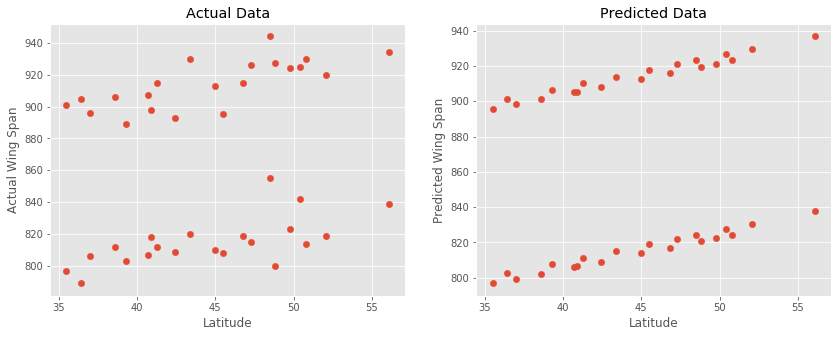

In [118]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

**Summary:** A `LinearRegression` uses the methods `fit` and `predict` to adapt itself to data, and to then make predictions.

### Classification: Logistic Regression

Our second example is **logistic regression**.  In logistic regression we have data $X$, and our response 
$y$ is a **binary** measurement.

A **binary** measurement can only take two values, which are traditionally labeled as $0$ and $1$.

Our example will use a dataset of wells in Bangladesh.  Many family wells are contaminated with arsenic; a team of scientists visited and measured:

  - The arsenic levels in each family's well.
  - The distance to the nearest safe well.
  - The level of education of the household.
  - The household's involvement in the community.
  
After discussing the level of arsenic with each family, the families with unsafe levels of arsenic were advised to switch to a nearby safe well.  Years later, the team followed up, and measured which families switched wells.

In [119]:
wells = pd.read_csv('./data/wells.dat', sep=' ')

In [120]:
wells.head()

,id,switch,arsenic,dist,assoc,educ
0,1,1,2.36,16.826000,0,0
1,2,1,0.71,47.321999,0,0
2,3,0,2.07,20.966999,0,10
3,4,1,1.15,21.486000,0,12
4,5,1,1.10,40.874001,1,14


We can use a logistic regression to predict whether a family will switch based on the other data the team measured.

The first step is to create a `LogisticRegression` object.

In [121]:
wells_regression = LogisticRegression()

We can use the `fit` method of the `LogisticRegression` object to train the model using our data.

In [124]:
# We don't need the id column, so drop it.
X_wells_names = np.array(['arsenic', 'dist', 'assoc', 'educ'])
X_wells = wells[X_wells_names]
# The response is already encoded as 0's, and 1's.
y_wells = wells['switch']
wells_regression.fit(X_wells, y_wells)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now that the regression has been fit, we can use the `predict` method to forecast whether our model thinks a family will switch wells.

In [125]:
wells_predictions = wells_regression.predict(X_wells)
print(wells_predictions[:10])

[1 0 1 1 1 1 1 1 1 1]


Additionally (and in many cases more usefully), the `LogisticRegression` has a `predict_proba` method that produces a predicted **probability** that a family will switch well.

In [126]:
wells_probabilities = wells_regression.predict_proba(X_wells)
print(wells_probabilities[:10])

[[0.311407   0.688593  ]
 [0.5618803  0.4381197 ]
 [0.26006313 0.73993687]
 [0.33248748 0.66751252]
 [0.38667832 0.61332168]
 [0.21450595 0.78549405]
 [0.36540595 0.63459405]
 [0.21669702 0.78330298]
 [0.31473513 0.68526487]
 [0.44449671 0.55550329]]


The `predict_proba` method creates a two column array, the first is the probability the family will not switch, the second is the probability they will.  This means that the rows of this matrix always add to $1$.

In [127]:
np.sum(wells_probabilities, axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

We can use the `predict_proba` method to plot the actual data, along with the predicted probabilities that a family will switch.

Text(0, 0.5, 'Probability of Switching')

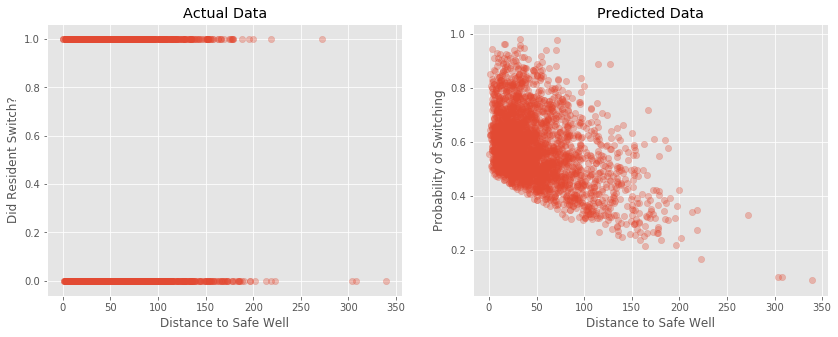

In [128]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(wells.dist, wells.switch, s=40, alpha=0.33)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Distance to Safe Well")
axs[0].set_ylabel("Did Resident Switch?")


axs[1].scatter(wells.dist, wells_probabilities[:, 1], s=40, alpha=0.33)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Distance to Safe Well")
axs[1].set_ylabel("Probability of Switching")

### All together

The two regression classes `LinearRegression` and `LogisticRegression` have many methods in common:

  - Both have a `fit` methods.  The `fit` methods for both take the same arguments `X` and `y`.
  - Both have a `predict` method.  The `predict` methods for both take the same argument, `X`.
  
We can summarize this by saying that **`LinearRegression` and `LogisticRegression` have the same interface**.  They have the same methods that are used to do the same conceptual tasks.  This allows us to write code that performs high level tasks using the `fit` and `predict` methods, which can then be used with any object that implements both `fit` and `predict` methods.

# Transformers

### Standardizing Data

~~THIS AND "Normalizer" WILL BE YOUR GOOD FRIENDS~~ 

One of the most ubiquitous transformers is the `StandardScaler`, which is used to **standardize** a data set.

A vector $x$ (like one of your data columns in a DataFrame) is said to be **standardized** if it has mean zero and standard deviation one.  If we take *any* vector, then we can transform it into a standardized one by subtracting its mean and dividing by its standard deviation.  This process is called **standardization**.

$$ X_{\text{standardized}} = \frac{x - \bar x}{\text{sd}(x)} $$

If you have some experience with `numpy`, then you can probably see that standardizing a numpy array is quite simple:

In [129]:
x = np.array([1, 0, 2, 2, 0, 1, 0, 2])
x_standardized = (x - np.mean(x)) / np.std(x)

The mean and standard deviation of the standardized vector are zero and one respectively:

In [81]:
print("Mean of standardized vector: ", np.mean(x_standardized))
print("Stanard deviation of standardized vector: ", np.std(x_standardized))

Mean of standardized vector:  0.0
Stanard deviation of standardized vector:  1.0


This approach to standardization is simple and understandable, which are certainly virtues!  It does start to run into some issues when used in real production machine learning code though:

  - We often want to standardize many vectors together in a bundle, but use different means and standard deviations for the different vectors.  This becomes awkward with the straight numpy approach.
  - Because of a concept called *data leakage* which we will discuss later, it is often neccessary to standardize one vector, and then use the **same** mean and standard deviation to transform other different vectors.  This requires us to memorize a bunch of means and standard deviations, and it's good to have an organizaing principle for this type of work.
  
Whenever we are in a situation where data transformations of some kind depend on some **parameters** (like the mean and standard deviation of the vector), the concept of object oriented programming starts to shine.

### The Standard Scaler

Sklearn includes a class used for standardizing all of the columns in a data set.

The `StandardScalar` class implements the **transformation interface**.   Here's how you use it.

#### 1. Create a `StandardScalar` object.

In [131]:
standardizer = StandardScaler()

#### 2.  Fit the `StandardScaler` object to a data set.

Use the `fit` method, and pass in the data set you would like to standardize.  Behind the scenes this computes and memorizes the mean and standard deviation of all the columns in the dataset.

We'll use a data set about distanse to wells in bangladesh as our working example:

In [132]:
wells = pd.read_csv('./wells.dat', sep=' ', index_col='id')
wells.head()

,switch,arsenic,dist,assoc,educ
id,,,,,
1,1,2.36,16.826000,0,0
2,1,0.71,47.321999,0,0
3,0,2.07,20.966999,0,10
4,1,1.15,21.486000,0,12
5,1,1.10,40.874001,1,14


In [133]:
standardizer.fit(wells)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### Question:

Notice that calling the fit method doesn't seem to really **do** much of anything.  So, what happens behind the scenes when we call the `fit` method?

#### 3. Transform a (possibly) different data set with the `StandardScaler` object.

Use the `transform` method on *any* dataset to perform the standardization (i.e., subtract the memorized mean from each column and divide by its memorized standard deviation. 

In [135]:
wells_standardized = standardizer.transform(wells)

We now have a **new** dataset that is a transformed version of our wells dataset.

In [136]:
wells_standardized

array([[ 0.85943576,  0.63499567, -0.81892321, -0.85594677, -1.20211479],
       [ 0.85943576, -0.85524506, -0.02624912, -0.85594677, -1.20211479],
       [-1.1635541 ,  0.37307458, -0.71128737, -0.85594677,  1.28752083],
       ...,
       [-1.1635541 , -1.0358803 , -1.05592488, -0.85594677, -0.20626054],
       [-1.1635541 , -0.9184674 , -0.66255101, -0.85594677, -0.4552241 ],
       [ 0.85943576, -0.90040387, -0.71448445,  1.16829696,  0.04270302]])

That would have been too easy. Oh Sklearn, why can't you just handle everything we want the way we want it all the time?

This is a common issue when working with sklearn: it is designed to work with numpy arrays, but **not** data frames.

In [137]:
type(wells_standardized)

numpy.ndarray

We can make the transformed data back into a dataframe using standard pandas techniques we've already learned:

In [138]:
wells_standardized = pd.DataFrame(wells_standardized, columns=wells.columns)

In [139]:
wells_standardized.head()

,switch,arsenic,dist,assoc,educ
0,0.859436,0.634996,-0.818923,-0.855947,-1.202115
1,0.859436,-0.855245,-0.026249,-0.855947,-1.202115
2,-1.163554,0.373075,-0.711287,-0.855947,1.287521
3,0.859436,-0.457848,-0.697797,-0.855947,1.785448
4,0.859436,-0.503006,-0.193850,1.168297,2.283375


**Question:**

What's going on here, why is there only two unique values of `switch` in the standardized data frame?

In [90]:
wells_standardized.loc[:, "switch"].unique()

array([ 0.85943576, -1.1635541 ])

**Question:**

What is the mean and standard deviation of the columns in `wells_standardized`?

In [91]:
for name, (_, col) in zip(wells.columns, wells_standardized.T.iterrows()):
    print("Mean of column {}: {:2.2f}".format(name, col.mean()))
    print("Standard Deviation of column {}: {:2.2f}".format(name, col.std()))

Mean of column switch: -0.00
Standard Deviation of column switch: 1.00
Mean of column arsenic: -0.00
Standard Deviation of column arsenic: 1.00
Mean of column dist: 0.00
Standard Deviation of column dist: 1.00
Mean of column assoc: -0.00
Standard Deviation of column assoc: 1.00
Mean of column educ: 0.00
Standard Deviation of column educ: 1.00


*[(How do we use format to make prettier print statements.)](https://thepythonguru.com/python-string-formatting/)

## Discretization (Binning)

It is occasionally useful to take a continuous feature, and convert it into a discrete feature by binning together the value of the original feature that fall within certain ranges.

For example, if we start with the feature vector:

$$ x = \left( \begin{array}{cccccccccc} 0.00 & 0.15 & 0.71 & 0.79 & 0.37 & 1.00 & 0.36 & 0.06 & 0.04 & 0.15 \end{array} \right) $$

We may have occassion to bin this into three buckets, say:

$$ B_1 = \left( -\infty, \frac{1}{3} \right\rbrack, \ B_2 = \left( \frac{1}{3}, \frac{2}{3} \right\rbrack, \ B_3 = \left( \frac{2}{3}, 1 \right\rbrack $$

If we label any data point in the first bucket as a `0`, and in the second bucket as a `1`, and any in the final bucket as a `2`, then this would transform our vector into:

$$ x_{\text{bucketed}} = \left( \begin{array}{cccccccccc} 0 & 0 & 2 & 2 & 2 & 2 & 1 & 0 & 0 & 0 \end{array} \right) $$

Sklearn also contains a tool for this type of operation.

In [92]:
# Note: Sklearn tools are designed to work with *column* vectors!
# This means you will often have to reshape(-1, 1) your row vectors into column vectors.
x = np.array([0.00, 0.15, 0.71, 0.79, 0.37, 1.00, 0.36, 0.06, 0.04, 0.15]).reshape(-1, 1)

#### 1. Create a `KBinsDiscretizer` object.

This time we need to supply a few parameters: the number of bins we want, and a strategy for computing the endpoints of the bins.  For information on what strategies are implemented, and how these strategies work, see [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer).

**Note**: You'll find in the documentation that there is a simple strategy that sklearn has **not** implemented: the user supplying the endpoints manually!  This happens often, where a tool provides some useful things, but not the thing that you really need.  This is why it is important to get practice programming, and develop the courage to build and test your own tools.

In [93]:
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

#### 2. Fit the KBinsDiscretizer object to a data set.

This works the same way as fitting the `StandardScaler` object.

In [94]:
binner.fit(x)

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='quantile')

#### Questions:

Again, what's going on behind the scenes when we call the `fit` method?

#### 3. Transform a (possibly) different data set with the `KBinsDiscretizer` object.

Again, this works the same way as within `StandardScaler`.

In [95]:
binner.transform(x)

array([[0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.]])

And, of course, we can transform a different array:

In [141]:
np.random.uniform(size=(10, 1))

array([[0.42624177],
       [0.22945286],
       [0.8483913 ],
       [0.12939148],
       [0.66402491],
       [0.77733668],
       [0.27056615],
       [0.54236873],
       [0.63605914],
       [0.56227831]])

In [96]:
binner.transform(np.random.uniform(size=(10, 1)))

array([[0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.]])

## Creating our Own Transformer: Grabbing Specific Columns

We saw in our last example that we may find need to create our own transformers.  Let's try our hand by creating a simple one that simply picks out specific columns in a data set. So, for example, we should be able to use our transformers to:

  - Select the first column only.
  - Select all but the last column.
  - Select the columns at even indexes.
  
  
#### The Transformer interface.  

To define a transformer, we need to define a class that implements both `fit` and `transform` methods.  This framework of "write a class that implements certain methods" is very, very important in object oriented programming.

In [143]:
class ColumnSelector:
    """Select columns out of an array or DataFrame.
    
    Parameters
    ----------
    idxs: np.array of int
      The column indexes to select.
    """
    def __init__(self, idxs):
        self.idxs = np.asarray(idxs)
        
    # Fit here doesn't need to do anything.  We already know the indices of the columns
    # we want to keep.
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, X, **transform_params):
        # Need to treat pandas data frames and numpy arrays slightly differently since the [...] 
        # indexing behaves differently for arrays and data frames.
        if isinstance(X, pd.DataFrame):
            return X.iloc[:, self.idxs]
        return X[:, self.idxs]

There are a few rules we need to follow:

  - `fit` needs to be defined as either `fit(self, *args, **kwargs)` (if we do not need to look at the data to fit the transformer), or `fit(self, X, *args, **kwargs)` (if we *do* need to look at the data).
  - `fit` needs to return `self`.  This is a common oversight, and will cause problems when using `Pipeline` below if forgotten.
  - `transform` needs to be defined as `transform(self, X, **transform_params)`, and returns the transformed data set.
  
This process, of implementing certain methods under some constraints, is called **coding to an interface**.  As long as it is done properly, it allows us to seamlessly use our objects inside of code that was designed to work with built in transformer objects.

Let's try it out.

In [144]:
# Selecting the first column
column_selector = ColumnSelector([0])
column_selector.fit()
wells_column_selected = column_selector.transform(wells)

Let's make sure our new DataFrame has exactly one column:

In [145]:
wells_column_selected.iloc[0:10, :]

,switch
id,
1,1
2,1
3,0
4,1
5,1
6,1
7,1
8,1
9,1


## Combining Objects: Pipelines

In [146]:
wells.head()

,switch,arsenic,dist,assoc,educ
id,,,,,
1,1,2.36,16.826000,0,0
2,1,0.71,47.321999,0,0
3,0,2.07,20.966999,0,10
4,1,1.15,21.486000,0,12
5,1,1.10,40.874001,1,14


One of the neat ideas that transformers allow is **chaining**.  We can take a single input dataset and apply multiple transformations in sequence.  This process is often called **pipelining** because we have metaphorically plumbed together a sequence of transformations.

The `Pipeline` class in sklearn allows us to chain together transformers, and optionally end the chain with a single regression or classification model.

In [103]:
wells_pipeline = Pipeline([
    # Select the columns that contain continuous data: arsenic and dist.
    ('continuous_column_selector', ColumnSelector([1, 2])),
    ('standardize', StandardScaler())
])

Above, we have chained together some of the transformers we discussed earlier:

```
X --ColumnSelector--> X_continuous_columns 
  --StandardScalar--> X_continuous_columns_standardized 
```

Once we have a `Pipeline` we only have to `fit` it **one time**.

In [104]:
wells_pipeline.fit(wells)

Pipeline(memory=None,
         steps=[('continuous_column_selector',
                 <__main__.ColumnSelector object at 0x1a2478a310>),
                ('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

This has **many, many advantages**.

  - It allows us to write **less code**.  Every line of code we write contains potential bugs, bugs are bad.
  - It creates a **conceptual unit**.  The `Pipeline` makes clear that each of these transformations is intended to be used **together**.  This makes the code easier to understand.
  - It makes our code **harder to abuse**.  Since we intend the transformers to be used together, we would like other developers or our future selves to think hard about whether they want to separate them.
  - It make the code more re-usable.  Future developers only have to do **one thing** to reuse all our transformers, instead of needing to `fit` all of them separately, this reduces the chance of mistakes.

Once our pipeline is fit, we can use it to transform our data set.  This applies **both** the transformers in the `Pipeline` **in sequence**.

In [105]:
wells_pipeline.transform(wells)

array([[ 0.63499567, -0.81892321],
       [-0.85524506, -0.02624912],
       [ 0.37307458, -0.71128737],
       ...,
       [-1.0358803 , -1.05592488],
       [-0.9184674 , -0.66255101],
       [-0.90040387, -0.71448445]])

We can also access the various transformers and regressors/classifiers by using the `named_steps` method.

In [106]:
# The column means memorized by the pipeline.
print(wells_pipeline.named_steps['standardize'].mean_)
# The column standard deviations memorized by the pipeline.
print(wells_pipeline.named_steps['standardize'].scale_)

[ 1.65693046 48.33186257]
[ 1.10720366 38.47230347]


These contain the means and standard deviations of the two columns in the data set that we selected.

In [107]:
print("Mean of arsenic: ", np.mean(wells['arsenic']))
print("Standard Deviation of arsenic: ", np.std(wells['arsenic']))

Mean of arsenic:  1.656930463576163
Standard Deviation of arsenic:  1.1072036618468495


#### Question:

When were these means and standard deviations computed?

### Another Custom Transformer in a Pipeline: Polynomial Expansion

Often it is useful to fit a **polynomial term** in a regression model (stay tuned!).  So, instead of creating a regression like

$$ \text{WingSize} \approx a + b \times \text{Latitude} $$

We would fit a polynomial curve, for example, a quadratic like

$$ \text{WingSize} \approx a + b \times \text{Latitude} + b \times \text{Latitude}^2 $$

Our first task is to write a transformer class that consumes a **single** column, and creates a matrix with the square, cube, etc of the column.

In [108]:
class PolynomialExpansion:
    """Transform a single column array or data frame using a polynomial.
    
    Parameters
    ----------
    idxs: np.array of int
      The column indexes to select.
    """
    def __init__(self, degree):
        self.degree = degree
        
    def fit(self, *args, **kwargs):
        # We still don't need to do anything when we fit this transformer, 
        # it doesn't need to learn anything from the data!
        return self
    
    def transform(self, X, **transform_params):
        # Initialize our return value as a matrix of all zeros.
        # We are going to overwrite all of these zeros in the code below.
        X_poly = np.zeros((X.shape[0], self.degree))
        # The first column in our transformed matrix is just the vector we started with.
        X_poly[:, 0] = X.squeeze()
        # Cleverness Alert:
        # We create the subsequent columns by multiplying the most recently created column
        # by X.  This creates the sequence X -> X^2 -> X^3 -> etc...
        for i in range(2, self.degree + 1):
            X_poly[:, i-1] = X_poly[:, i-2] * X.squeeze()
        return X_poly

Let's test this out on a simple example.

In [109]:
X = np.array([[1], [2], [3], [4]])
poly = PolynomialExpansion(3)
poly.fit(X)
poly.transform(X)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We can use this in a pipeline if our initial matrix has more than one column:  

  - We use the `ColumnSelector` to grab a single column.
  - Then a `PolynomialExpansion` to make ten polynomial columns.

In [110]:
dist_poly = Pipeline([
    ('distance_selector', ColumnSelector([2])),
    ('quadratic_expansion', PolynomialExpansion(2))
])
dist_poly.fit(wells)

Pipeline(memory=None,
         steps=[('distance_selector',
                 <__main__.ColumnSelector object at 0x1a24865510>),
                ('quadratic_expansion',
                 <__main__.PolynomialExpansion object at 0x1a24865550>)],
         verbose=False)

Now we can transform the data frame to get our polynomial terms.

In [111]:
quadratic_distance = dist_poly.transform(wells)
quadratic_distance

array([[  16.82600021,  283.11428319],
       [  47.3219986 , 2239.37155114],
       [  20.96699905,  439.61504933],
       ...,
       [   7.70800018,   59.41326682],
       [  22.84199905,  521.75692078],
       [  20.84399986,  434.47233028]])

The second column is indeed the square of the first:

In [112]:
quadratic_distance[:, 1] == quadratic_distance[:, 0]**2

array([ True,  True,  True, ...,  True,  True,  True])

## Combining Objects: FeatureUnion

What if we want to create a polynomial expansion using **two** features in our model?

To accomplish this, we would need to grab two different columns, take a polynomial transformation of them individually, and then re-join the results into a single matrix:

```  
    +--- Select Column 1 --- Polynomial Expansion ---+
X --+                                                +--- Rejoin --> X transfomed
    +--- Select Column 2 --- Polynomial Expansion ---+
```

The splitting and rejoining operation can be accomplished with another sklean feature, the `FeatureUnion`.

### A silly example of `FeatureUnion`.

Here's a simple example:

```  
    +--- Select Column 1 ---+
X --+                       +--- Rejoin --> X transfomed
    +--- Select Column 2 ---+
```

In [113]:
two_columns = FeatureUnion([
    ('arsenic_selector', ColumnSelector([0])),
    ('distance_selector', ColumnSelector([1]))
])
two_columns.fit(wells)
print(two_columns.transform(wells))

[[1.   2.36]
 [1.   0.71]
 [0.   2.07]
 ...
 [0.   0.51]
 [0.   0.64]
 [1.   0.66]]


You can see that all we've done is selected the first two columns, which is admittedly, kind of silly.  In this case we could have just used `ColumnSelector([0, 1])`.

In [114]:
wells.head()

,switch,arsenic,dist,assoc,educ
id,,,,,
1,1,2.36,16.826000,0,0
2,1,0.71,47.321999,0,0
3,0,2.07,20.966999,0,10
4,1,1.15,21.486000,0,12
5,1,1.10,40.874001,1,14


### A more useful example of `FeatureUnion`.

Let's end by putting together the example I outlined above:

```  
    +--> Select Column 1 --> Standardize --> Polynomial ---+
X --+                                                      +--- Rejoin --> X transfomed
    +--> Select Column 2 --> Standardize --> Polynomial ---+
```

We will use polynomials of degree 2.

In [115]:
wells_pipeline = FeatureUnion([
    ('arsenic_quadratic', Pipeline([
        ('arsenic_selector', ColumnSelector([1])),
        ('arsenic_standardizer', StandardScaler()),
        ('quadratic_expansion', PolynomialExpansion(2))
    ])),
    ('distance_quadratic', Pipeline([
        ('distance_selector', ColumnSelector([2])),
        ('distance_standardizer', StandardScaler()),
        ('quadratic_expansion', PolynomialExpansion(2))         
    ]))
])

This is now a pipline of considerable complexity.  Even so, using it is exactly the same as any of the simpler pipelines that we constructed earlier.

In [116]:
wells_pipeline.fit(wells)

FeatureUnion(n_jobs=None,
             transformer_list=[('arsenic_quadratic',
                                Pipeline(memory=None,
                                         steps=[('arsenic_selector',
                                                 <__main__.ColumnSelector object at 0x1a24866950>),
                                                ('arsenic_standardizer',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True)),
                                                ('quadratic_expansion',
                                                 <__main__.PolynomialExpansion object at 0x1a248668d0>)],
                                         verbose=False)),
                               ('distance_quadratic',
                                Pipeline(memory=None,
                                         step

In [117]:
wells_quadratic = wells_pipeline.transform(wells)

In [118]:
wells_quadratic

array([[ 6.34995675e-01,  4.03219507e-01, -8.18923213e-01,
         6.70635228e-01],
       [-8.55245061e-01,  7.31444115e-01, -2.62491165e-02,
         6.89016115e-04],
       [ 3.73074576e-01,  1.39184639e-01, -7.11287369e-01,
         5.05929721e-01],
       ...,
       [-1.03588030e+00,  1.07304800e+00, -1.05592488e+00,
         1.11497735e+00],
       [-9.18467395e-01,  8.43582357e-01, -6.62551010e-01,
         4.38973841e-01],
       [-9.00403871e-01,  8.10727132e-01, -7.14484453e-01,
         5.10488034e-01]])